# Analytical Boundary Expansions for EMDA Holographic QCP

This notebook implements the systematic boundary expansion analysis described in Appendix D of our paper "Capturing quantum phase transition in the ultraviolet region by holography".

## Physical Context

We study Einstein-Maxwell-Dilaton-Axion (EMDA) theory in the holographic context, where quantum phase transitions can be diagnosed through ultraviolet observables. This notebook derives the analytical relationships between expansion coefficients of bulk fields $\{U, V_1, V_2, a, \varphi\}$ at the AdS boundary ($z \to 0$).

## Mathematical Framework

- **Boundary coordinate**: $z \in [0,1]$ (AdS boundary at $z=0$, horizon at $z=1$)
- **Metric ansatz**: $P = U(1-z)(1+z+z^2-\mu^2 z^3/4)$
- **Bulk fields**: $\{U[z], V_1[z], V_2[z], a[z], \varphi[z]\}$ 
- **Critical parameters**: $\mu$ (chemical potential), $\lambda$ (coupling), $k$ (momentum)

## Setup: Load Equations of Motion

Import the pre-computed equations of motion from the data directory and define the field functions.

EOM loaded successfully
EOM dimensions: 5


{<<5>>}
{U, V1, V2, a, φ}
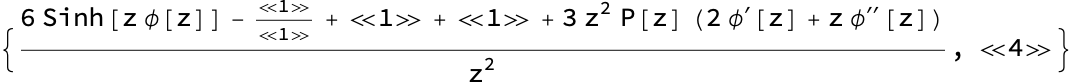
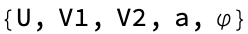

In [5]:
(* Load the five coupled differential equations for bulk fields *)
eom = <<"data/eom";

Print["EOM loaded successfully"];

Print["EOM dimensions: ", Dimensions[eom][[1]]];

Short[eom, 2]

(* Define the five holographic bulk field functions *)
func = {U, V1, V2, a, φ};
(* Print["Bulk field functions defined: *)

func

## Boundary Expansion Methodology

We perform systematic series expansions of the bulk fields near the AdS boundary ($z \to 0$):

Each field is expanded as: $f[z] = \sum_{i} f_i z^i$

The boundary conditions are: $\{U[0] \to 1, V_1[0] \to 1, V_2[0] \to 1, a[0] \to 1\}$

We solve the equations of motion order by order, incorporating constraints from previous orders.

Field expansion v1 created with boundary conditions
Boundary conditions applied: U[0] = V1[0] = V2[0] = a[0] = 1
Metric ansatz P -> U transformation defined
Initial expansion setup complete


3
                                        2    2 z
P -> Function[z, (1 - z) U[z] (1 + z + z  - μ  --)]
                                               4
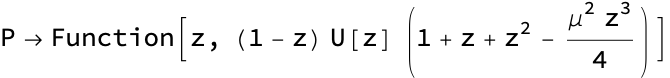

In [17]:
(* Version 1: Initial field expansions with boundary conditions *)
z0expanOffeildv1 = {
    U -> Function[z, Sum[U[i] z^i, {i, 0, 6}] // Evaluate], 
    V1 -> Function[z, Sum[V1[i] z^i, {i, 0, 6}] // Evaluate], 
    V2 -> Function[z, Sum[V2[i] z^i, {i, 0, 6}] // Evaluate], 
    a -> Function[z, Sum[a[i] z^i, {i, 0, 6}] // Evaluate], 
    ϕ -> Function[z, Sum[ϕ[i] z^i, {i, 0, 6}] // Evaluate]
} /. {U[0] -> 1, V1[0] -> 1, V2[0] -> 1, a[0] -> 1};

Print["Field expansion v1 created with boundary conditions"];
Print["Boundary conditions applied: U[0] = V1[0] = V2[0] = a[0] = 1"];

(* Metric ansatz transformation *)
repPtoU = P -> Function[z, (1 - z) U[z] (1 + z + z^2 - μ^2 z^3/4)];
Print["Metric ansatz P -> U transformation defined"];

repPtoU

Print["Initial expansion setup complete"];

Order -1 EOM extracted
Order -1 equations: 
Order -1 constraints found: 2 relations
Order -1 solutions: 


-4 U[1] + 3 V1[1] + V2[1]  -4 U[1] + V1[1] + 3 V2[1]
{0, 0, 0, -------------------------, -------------------------}
                     2 z                        2 z
{U[1] -> V1[1], V2[1] -> V1[1]}
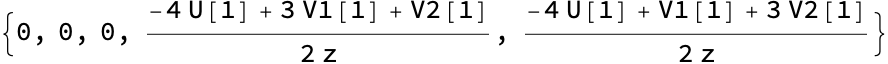
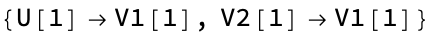

In [23]:
(* Series expansion at order -1 *)
eomOrderNeg1 = Simplify[Series[eom /. repPtoU /. z0expanOffeildv1, {z, 0, -1}]] // Normal;

Print["Order -1 EOM extracted"];
Print["Order -1 equations: "];
Short[eomOrderNeg1, 3]

(* Solve for coefficients U[1] and V2[1] *)
equOrderNeg1 = Solve[Thread[eomOrderNeg1 == Table[0, {i, 5}]], {U[1], V2[1]}][[1]];
Print["Order -1 constraints found: ", Length[equOrderNeg1], " relations"] ;
Print["Order -1 solutions: "];

equOrderNeg1

In [29]:
(* Version 2: Incorporate order -1 constraints *)
z0expanOffeildv2 = z0expanOffeildv1 /. equOrderNeg1;
Print["Version 2 expansion incorporates order -1 constraints"];
Print["Applied constraints: "<>ToString[equOrderNeg1]];

Print["Updated expansion v2 ready for order 0 analysis"];

Version 2 expansion incorporates order -1 constraints
Applied constraints: {U[1] -> V1[1], V2[1] -> V1[1]}
Updated expansion v2 ready for order 0 analysis


## Order 0 Analysis

Continue to order $z^0$ to determine additional coefficient relationships.

Order 0 EOM extracted
Order 0 equations structure: {5}
Order 0 constraints: 4 relations found
Order 0 solutions: 


2         2
         2 a[1] + V1[1] - a[1] V1[1]          V1[1]  - 3 ϕ[0]
{a[2] -> ---------------------------, U[2] -> ----------------, 
                      2                              4
 
                  2         2                2         2
             V1[1]  - 3 ϕ[0]            V1[1]  - 3 ϕ[0]
>   V1[2] -> ----------------, V2[2] -> ----------------}
                    4                          4
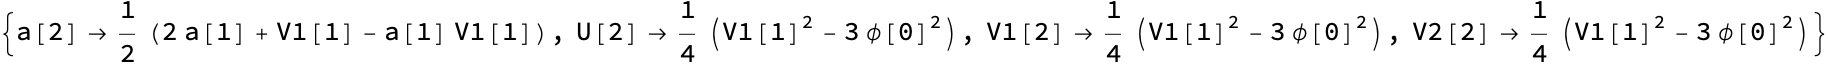

In [42]:
(* Series expansion at order 0 *)
eomOrder0 = Simplify[Series[eom /. repPtoU /. z0expanOffeildv2, {z, 0, 0}]] // Normal;
Print["Order 0 EOM extracted"];
Print["Order 0 equations structure: ", Dimensions[eomOrder0]];

(* Solve for second-order coefficients *)
equOrder0 = Solve[Thread[eomOrder0 == Table[0, {i, 5}]], {a[2], U[2], V1[2], V2[2]}][[1]];
Print["Order 0 constraints: ", Length[equOrder0], " relations found"];
Print["Order 0 solutions: "];

equOrder0

In [43]:
(* Version 3: Incorporate order 0 constraints *)
z0expanOffeildv3 = z0expanOffeildv1 /. equOrder0 /. equOrderNeg1;
Print["Version 3 expansion incorporates orders -1 and 0 constraints"];
Print["Total constraints applied: ", Length[equOrderNeg1] + Length[equOrder0]];
Print["Updated expansion v3 ready for order 1 analysis"];

Version 3 expansion incorporates orders -1 and 0 constraints
Total constraints applied: 6
Updated expansion v3 ready for order 1 analysis


## Order 1 Analysis

Analyze order $z^1$ terms to further constrain the expansion coefficients.

Order 1 EOM extracted
Order 1 equations structure: {5}
Order 1 constraints found: 3 relations
Order 1 solutions (including dilaton \[Phi][1]): equOrder1


2               2              3
            1   -24 khat  ϕ[0] + 3 V1[1]  ϕ[0] - 7 ϕ[0]  + 12 ϕ[2]
{{ϕ[1] -> -(--) --------------------------------------------------, 
            12                        V1[1]
 
                                                     2             2       2
>    a[3] -> (4 a[1] + 2 V1[1] - 2 a[1] V1[1] - V1[1]  + a[1] V1[1]  - ϕ[0]  + 
 
                 2            2                2
>        2 γ ϕ[0]  + a[1] ϕ[0]  - 2 γ a[1] ϕ[0] ) / 4, 
 
                1
>    V2[3] -> -(-) 
                6
 
                               2     2          2     2         4
        6 V1[1] V1[3] + 24 khat  ϕ[0]  + 3 V1[1]  ϕ[0]  + 7 ϕ[0]  - 12 ϕ[0] ϕ[2]
>       ------------------------------------------------------------------------}}
                                         V1[1]
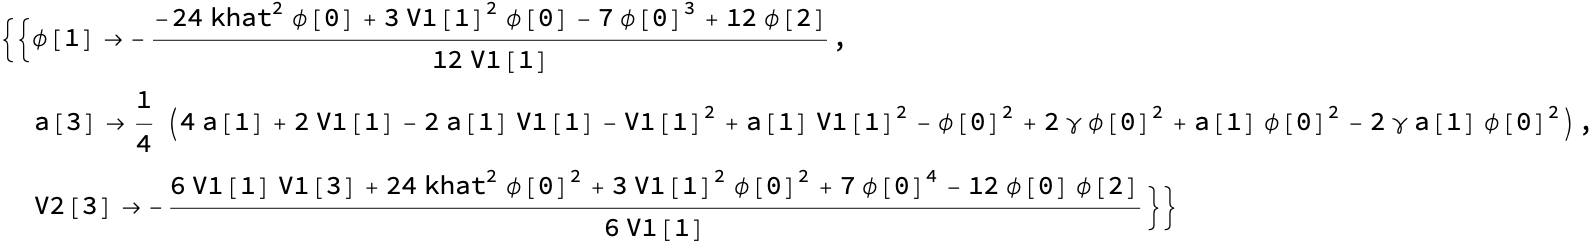

In [53]:
(* Series expansion at order 1 *)
eomOrder1 = Simplify[Series[eom /. repPtoU /. z0expanOffeildv3, {z, 0, 1}]] // Normal;

Print["Order 1 EOM extracted"];
Print["Order 1 equations structure: ", Dimensions[eomOrder1]];

(* Solve for third-order coefficients including dilaton ϕ[1] *)

Solve[Thread[eomOrder1 == Table[0, {i, 5}]], {ϕ[1], a[3], V2[3]}]

equOrder1 =Solve[Thread[eomOrder1 == Table[0, {i, 5}]], {ϕ[1], a[3], V2[3]}][[1]];


Print["Order 1 constraints found: ", Length[equOrder1], " relations"];

Print["Order 1 solutions (including dilaton ϕ[1]): equOrder1"];

In [57]:
(* Version 4: Incorporate order 1 constraints *)
z0expanOffeildv4 = z0expanOffeildv1 /. equOrder1 /. equOrder0 /. equOrderNeg1;
Print["Version 4 expansion incorporates orders -1, 0, and 1 constraints"];
Print["Total constraints applied: ", Length[equOrderNeg1] + Length[equOrder0] + Length[equOrder1]];
Print["Updated expansion v4 ready for order 2 analysis"];

Version 4 expansion incorporates orders -1, 0, and 1 constraints
Total constraints applied: 9
Updated expansion v4 ready for order 2 analysis


## Order 2 Analysis
Proceed to order $z^2$ analysis to determine the remaining coefficient relationships and complete the systematic boundary expansion.

At order $z^2$, we extract terms:

$$\text{EOM}|_{z^2} = 0$$

In [62]:
(* Series expansion at order 2 *)
eomOrder2 = Simplify[Series[eom /. repPtoU /. z0expanOffeildv4, {z, 0, 2}]] // Normal;
Print["Order 2 EOM extracted"];
Print["Order 2 equations structure: ", Dimensions[eomOrder2]];

(* Solve for fourth-order coefficients *)
equOrder2 = Solve[Thread[eomOrder2 == Table[0, {i, 5}]], {ϕ[2], a[4], U[4], V1[4], V2[4]}][[1]];

Print["Order 2 analysis complete - ", Length[equOrder2], " additional constraints"];
Print["Order 2 solutions: equOrder2"];


Order 2 EOM extracted
Order 2 equations structure: {5}
Order 2 analysis complete - 5 additional constraints
Order 2 solutions: equOrder2


Final expansion z0expanOffeildv5 complete
Final expansion simplified
Systematic boundary expansion analysis finished
Total constraints solved: 14
All field coefficients now expressed in terms of independent parameters


2         2
                                 2 V1[1]  - 3 ϕ[0]     3
{U -> Function[z, 1 + z V1[1] + z  ---------------- + z  U[3] + 
                                          4
 
        4           4  2                4  2     2           4
>      z  (-256 khat  μ  a[1] + 128 khat  μ  a[1]  + 768 khat  V1[1] + 
 
                   4  2                 4                      2  2           2
>          192 khat  μ  V1[1] - 256 khat  U[3] V1[1] - 576 khat  μ  a[1] V1[1]  + 
 
                   2  2     2      2            2      3           2  2      3
>          288 khat  μ  a[1]  V1[1]  + 1728 khat  V1[1]  + 432 khat  μ  V1[1]  - 
 
                   2           3        2           4        2     2      4
>          576 khat  U[3] V1[1]  - 324 μ  a[1] V1[1]  + 162 μ  a[1]  V1[1]  + 
 
                    5        2      5                 5          2      2     2
>          972 V1[1]  + 243 μ  V1[1]  - 324 U[3] V1[1]  - 16 ϕ[0]  - 8 μ  ϕ[0]  - 
 
            4     2           2  2          2           2  2     2     2
>          μ  ϕ[0]  - 832 khat  μ  a[1] ϕ[0]  + 416 khat  μ  a[1]  ϕ[0]  + 
 
                       2      2          2          2     2            2           2
>          32 U[3] ϕ[0]  + 8 μ  U[3] ϕ[0]  - 16 U[3]  ϕ[0]  + 3072 khat  V1[1] ϕ[0]  + 
 
                   2  2           2            2                2
>          768 khat  μ  V1[1] ϕ[0]  - 1408 khat  U[3] V1[1] ϕ[0]  - 
 
                    4      2     2        2           2     2
>          5184 khat  V1[1]  ϕ[0]  - 936 μ  a[1] V1[1]  ϕ[0]  + 
 
                2     2      2     2             3     2        2      3     2
>          468 μ  a[1]  V1[1]  ϕ[0]  + 2832 V1[1]  ϕ[0]  + 708 μ  V1[1]  ϕ[0]  - 
 
                         3     2           2      4     2          6     2
>          960 U[3] V1[1]  ϕ[0]  - 432 khat  V1[1]  ϕ[0]  - 9 V1[1]  ϕ[0]  - 
 
                   4     4        2          4        2     2     4                  4
>          128 khat  ϕ[0]  - 676 μ  a[1] ϕ[0]  + 338 μ  a[1]  ϕ[0]  + 2196 V1[1] ϕ[0]  + 
 
                2           4                      4            2      2     4
>          549 μ  V1[1] ϕ[0]  - 844 U[3] V1[1] ϕ[0]  - 3312 khat  V1[1]  ϕ[0]  - 
 
                    4     4           2     6            2     6           8
>          288 V1[1]  ϕ[0]  - 416 khat  ϕ[0]  - 909 V1[1]  ϕ[0]  - 338 ϕ[0]  + 
 
                               2
>          192 ϕ[0] ϕ[3] + 48 μ  ϕ[0] ϕ[3] - 192 U[3] ϕ[0] ϕ[3] - 
 
                    2                            3                            3
>          3456 khat  V1[1] ϕ[0] ϕ[3] - 144 V1[1]  ϕ[0] ϕ[3] - 1008 V1[1] ϕ[0]  ϕ[3] - 
 
                   2              2          2          2 2     5         6
>          576 ϕ[3] ) / (8 (8 khat  + 9 V1[1]  + 13 ϕ[0] ) ) + z  U[5] + z  U[6]], 
 
                                            2         2
                                     2 V1[1]  - 3 ϕ[0]     3
>   V1 -> Function[z, 1 + z V1[1] + z  ---------------- + z  V1[3] + 
                                              4
 
        4           4                       2      3                  5
>      z  (-256 khat  V1[1] V1[3] - 576 khat  V1[1]  V1[3] - 324 V1[1]  V1[3] - 
 
                  2            6     2      2     2    4     2               2
>          16 ϕ[0]  - 1536 khat  ϕ[0]  - 8 μ  ϕ[0]  - μ  ϕ[0]  + 32 U[3] ϕ[0]  + 
 
              2          2          2     2           2           2
>          8 μ  U[3] ϕ[0]  - 16 U[3]  ϕ[0]  + 576 khat  V1[1] ϕ[0]  + 
 
                   2  2           2           2                2
>          144 khat  μ  V1[1] ϕ[0]  - 576 khat  U[3] V1[1] ϕ[0]  - 
 
                    4      2     2           3     2      2      3     2
>          8640 khat  V1[1]  ϕ[0]  + 24 V1[1]  ϕ[0]  + 6 μ  V1[1]  ϕ[0]  - 
 
                        3     2            2      4     2          6     2
>          24 U[3] V1[1]  ϕ[0]  - 2376 khat  V1[1]  ϕ[0]  - 9 V1[1]  ϕ[0]  - 
 
                   2                 2            3
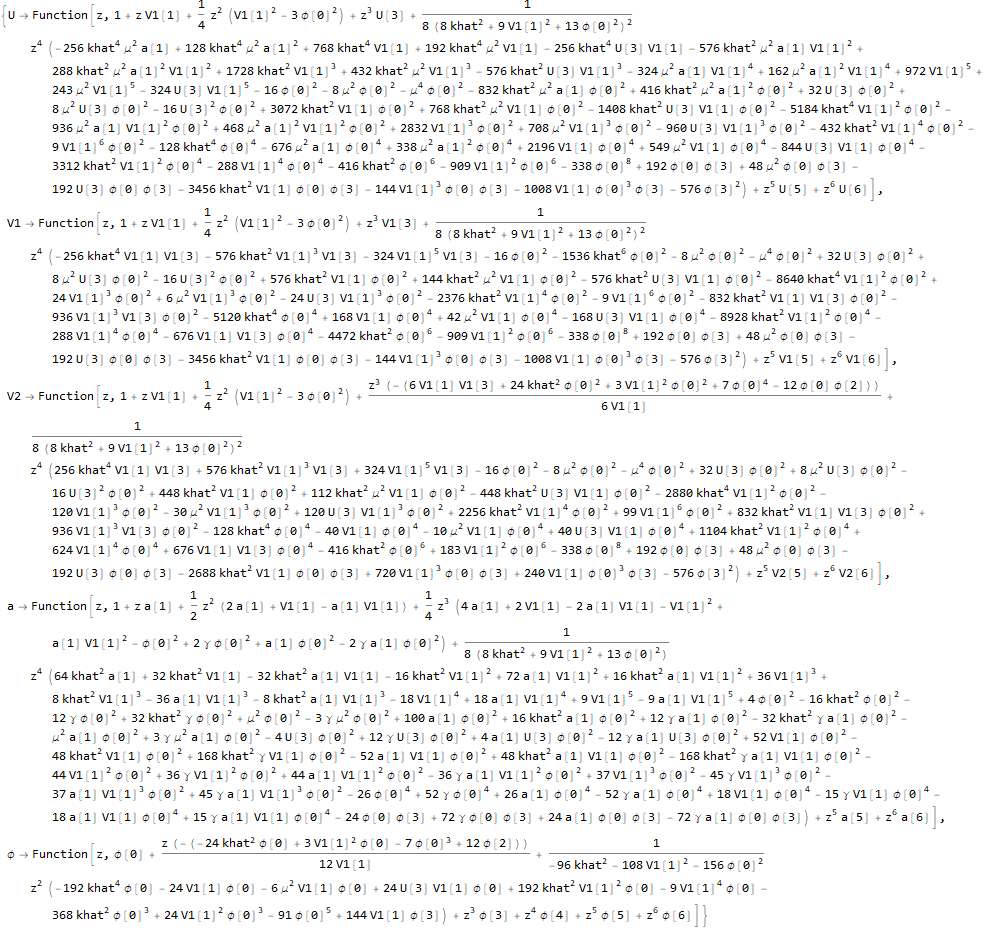

In [91]:
(* Final Version 5: Complete boundary expansion *)
z0expanOffeildv5 = z0expanOffeildv1 /. equOrder2 /. equOrder1 /. equOrder0 /. equOrderNeg1;
Print["Final expansion z0expanOffeildv5 complete"];

(* Simplify the final form *)
z0expanOffeildv5Final = z0expanOffeildv5 // Simplify;
Print["Final expansion simplified"];

(* Display summary of constraint solving *)
totalConstraints = Length[equOrderNeg1] + Length[equOrder0] + Length[equOrder1] + Length[equOrder2];
Print["Systematic boundary expansion analysis finished"];
Print["Total constraints solved: ", totalConstraints];
Print["All field coefficients now expressed in terms of independent parameters"];

(* Show structure of final expansion *)
z0expanOffeildv5Final

Corresponding to Appendix D

This expansion is crucial for calculating UV observables that diagnose quantum critical points.

## Connection to UV Observables

The coefficients determined here feed directly into:
- High-frequency conductivity calculations  
- Entanglement entropy derivatives
- Critical signatures in UV region analysis